# Feature based con features seleccionados + nuevos (Todos los años)

In [1]:
#!pip install tsfeatures

In [2]:
#!pip install entropy

In [12]:
from sklearn.metrics import davies_bouldin_score

In [14]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tsfeature as tsf
import entropy as ent
my_path = os.path.abspath('')
my_path = my_path.split('\\')
my_path_py = "\\".join(my_path[:-1])
my_path_py

'C:\\Users\\gioma\\Documents\\GitHub\\Tesis\\Paraguay'

In [20]:
df= pd.read_csv(my_path_py+'\\DatosRaw\\notificaciones_clima_7_dias_COMBINADO_SEMANAL.csv', sep=';')
poblacion= pd.read_csv(my_path_py+'\\DatosRaw\\Poblacion_Paraguay.csv', sep=',')

In [6]:
poblacion['#'] = poblacion['#'].str.upper()
poblacion = poblacion.head(268)
poblacion.rename(columns = {'#':'Ciudad'}, inplace = True)

In [7]:
print("La cantidad de ciudades con casos es:", df['distrito_notif'].nunique())
print("La cantidad de ciudades con datos de población:", poblacion['Ciudad'].nunique())

La cantidad de ciudades con casos es: 238
La cantidad de ciudades con datos de población: 266


In [8]:
S1 = set(list(dict.fromkeys(df['distrito_notif'].tolist())))
S2 = set(list(dict.fromkeys(poblacion['Ciudad'].tolist())))
ciudades = S1.intersection(S2)
df

,anio,semana,distrito_notif,tmax,tmin,tmed,td,pres_est,pres_nm,prcp,hr,helio,nub,vmax_d,vmax_f,vmed,id_estacion,casos
0,2009,2,ASUNCION,29.7,20.5,23.9,16.85,1001.05,1010.55,2,68,6.6,4.5,??,??,??,86218,2
1,2009,2,FERNANDO DE LA MORA,38,24.6,29.2,22.1,998.3,1007.6,0,68,11.1,5,??,??,??,86218,1
2,2009,2,PEDRO JUAN CABALLERO,27.7,21.3,23.1,20.9,947,1008.3,32.6,88.5,1.85,6.5,??,??,??,86097,2
3,2009,2,YBY YAU,27.4,20.65,22.65,20.475,947.1,1008.5,16.775,88.5,2.875,6.5,??,??,??,86097,4
4,2009,2,YPANE,29,20.2,23.3,16,1001.6,1011.2,0,66,7.5,6,??,??,??,86218,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,2013,52,VILLA HAYES,35.46666667,24.48333333,29.86666667,21.86666667,998.2666667,1007.683333,2.133333333,65.16666667,10.61666667,4,14.66666667,2.126666667,1.308333333,86218,6
8483,2013,52,VILLETA,34.53333333,23.6,28.7,21.73333333,996.6666667,1006.1,0.1,67.66666667,7.866666667,3.333333333,14.33333333,1.573333333,0.786666667,86218,3
8484,2013,52,YAGUARON,35,22.8,29.7,23.4,995.3,1008.4,0,70,10,1,0,0,0,86221,1
8485,2013,52,YPACARAI,36,24,29.2,21.4,994.7,1007.9,0,65,10.7,1,18,1.11,0.28,86221,2


In [9]:
df = df[['anio','distrito_notif', 'semana', 'casos']]


In [10]:
df.rename(columns = {'anio':'Año', 'distrito_notif':'Distrito'}, inplace = True)
df = df[df['Distrito'].isin(ciudades)]
listaDistrito = df['Distrito'].tolist()
listaDistrito = list(dict.fromkeys(listaDistrito))
print(listaDistrito)

['ASUNCION', 'FERNANDO DE LA MORA', 'PEDRO JUAN CABALLERO', 'YBY YAU', 'YPANE', 'CAPIATA', 'CAPITAN BADO', 'HORQUETA', 'BELEN', 'CECILIO BAEZ', 'CONCEPCION', 'LAMBARE', 'BELLA VISTA', 'HERNANDARIAS', 'ITAKYRY', 'ITAUGUA', 'CORONEL OVIEDO', 'LOMA PLATA', 'LUQUE', 'MCAL. ESTIGARRIBIA', 'MINGA GUAZU', 'PIRAYU', 'SAN ALBERTO', 'VILLA ELISA', 'YAGUARON', 'YPACARAI', 'CAACUPE', 'EMBOSCADA', 'ITA', 'LIMPIO', 'MARIANO ROQUE ALONSO', 'SAN LORENZO', 'VILLETA', 'GUARAMBARE', 'J A SALDIVAR', 'SAN JOSE DE LOS ARROYOS', 'CAAGUAZU', 'JUAN LEON MALLORQUIN', 'LORETO', 'NUEVA ITALIA', 'VILLA HAYES', 'ACAHAY', 'CARAPEGUA', 'CHORE', 'ENCARNACION', 'FRAM', 'JOSE DOMINGO OCAMPOS', 'JUAN E. OLEARY', 'PARAGUARI', 'REPATRIACION', 'SAN ANTONIO', 'SAN JUAN NEPOMUCENO', 'SANTA ROSA', 'LOMA GRANDE', 'SAN BERNARDINO', 'SAN ESTANISLAO', 'AREGUA', 'ARROYOS Y ESTEROS', 'EUSEBIO AYALA', 'ITACURUBI DE LA CORDILLERA', 'LA PALOMA', 'MINGA PORA', 'PILAR', 'SALTO DEL GUAIRA', 'SAN PEDRO', 'VILLARRICA', 'ALBERDI', 'CAMBYRETA

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
pob = []
for year in list(range(2009,2014)):
    aux = df[df['Año'] == year]
    for dis in aux.Distrito.values:
        pob.append(int(poblacion[poblacion.Ciudad == dis][str(year)].values[0]))   
print(len(pob))

7276


In [12]:
df['Poblacion'] = pob
df['incidencia'] = (df.casos/df.Poblacion)*100000
df['semana'] = df['semana'] + df['Año'].apply(lambda x: (x-2009)*53 if x>2009 else 0)
df.reset_index(drop=True)

,Año,Distrito,semana,casos,Poblacion,incidencia
0,2009,ASUNCION,2,2,531388,0.376373
1,2009,FERNANDO DE LA MORA,2,1,143116,0.698734
2,2009,PEDRO JUAN CABALLERO,2,2,103243,1.937177
3,2009,YBY YAU,2,4,25630,15.606711
4,2009,YPANE,2,1,36547,2.736203
...,...,...,...,...,...,...
7271,2013,VILLA HAYES,264,6,46033,13.034128
7272,2013,VILLETA,264,3,33890,8.852169
7273,2013,YAGUARON,264,1,30369,3.292832
7274,2013,YPACARAI,264,2,25002,7.999360


In [13]:
def run_length_encoding(x):
    """
    :param x: np.array
    :return: np.array
    """
    pos, = np.where(np.diff(x) != 0)
    pos = np.concatenate(([0], pos+1, [len(x)]))
    # rle = [(a,b,x[a]) for (a,b) in zip(pos[:-1],pos[1:])]
    rle = [b - a for (a, b) in zip(pos[:-1], pos[1:])]
    return rle


def hysteresis(x, th_lo, th_hi, initial=False):
    """
    :param x: np.array
    :param th_lo: float
    :param th_hi: float
    :param initial: ???
    :return:
    """
    hi = x >= th_hi
    lo_or_hi = (x <= th_lo) | hi
    ind = np.nonzero(lo_or_hi)[0]
    # prevent index error if ind is empty
    if not ind.size:
        return np.zeros_like(x, dtype=bool) | initial
    # from 0 to len(x)
    cnt = np.cumsum(lo_or_hi)
    return np.where(cnt, hi[ind[cnt-1]], initial)


def arg_longest_not_null(x):
    # pad with np.nan while finding where null
    m = np.concatenate(( [True], np.isnan(x), [True] ))
    # Start-stop limits
    ss = np.flatnonzero(m[1:] != m[:-1]).reshape(-1,2)
    # Get max interval, interval limits
    start, stop = ss[(ss[:,1] - ss[:,0]).argmax()]
    return start, stop

In [14]:
class poly(object):
    """ Orthogonal polynomials

    Source:
        http://davmre.github.io/python/2013/12/15/orthogonal_poly
    """

    def __init__(self):
        self.degree = None
        self.z = None
        self.norm2 = None
        self.alpha = None

    def fit(self, x, degree=1):

        self.degree = degree

        n = degree + 1
        x = np.asarray(x).flatten()
        if degree >= len(np.unique(x)):
            raise ValueError("'degree' must be less than number of unique points")

        xbar = np.mean(x)
        x = x - xbar
        q, r = np.linalg.qr(np.fliplr(np.vander(x, n)))

        z = np.diag(np.diag(r))
        raw = np.dot(q, z)

        norm2 = np.sum(raw**2, axis=0)
        alpha = (np.sum((raw**2)*np.reshape(x, (-1, 1)), axis=0)/norm2 + xbar)[:degree]
        z = raw / np.sqrt(norm2)

        self.z = z
        self.norm2 = norm2
        self.alpha = alpha

    def predict(self, x):
        x = np.asarray(x).flatten()
        n = self.degree + 1
        z = np.empty((len(x), n))
        z[:, 0] = 1

        if self.degree > 0:
            z[:, 1] = x - self.alpha[0]

        if self.degree > 1:
            for i in np.arange(1, self.degree):
                z[:, i+1] = (x - self.alpha[i]) * z[:, i] - (self.norm2[i] / self.norm2[i-1]) * z[:, i-1]

        z /= np.sqrt(self.norm2)

        return z

# Fig Func

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale as scale_data


def biplot_features(x, robust=False, scale=True,  col=None, **kwargs):
    X = x.dropna(axis=1, how='all').dropna(axis=0, how='any')

    if col is None:
        col = ("#000000", "darkred")
    else:
        col = [col] if not isinstance(col, (list, tuple)) else col
        col = np.unique(col)

        if len(col) == 1:
            col = np.repeat(col, 2)
        else:
            col = np.unique(col)[0:2]

    if scale:
        X = scale_data(X, with_mean=True, with_std=True)

    if robust:
        raise NotImplemented('Robust PCA has not been implemented yet')
    else:
        pca = PCA(n_components=2)
        pca.fit(X)
        proj_pca = pca.transform(X)

    plt.figure()
    plt.scatter(x=proj_pca[:, 0], y=proj_pca[:, 1], c=col)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

In [16]:
import statsmodels.api as sm

from statsmodels.formula.api import ols
from scipy.stats import gaussian_kde
from scipy.stats import norm
from scipy.stats import boxcox_normmax
from statsmodels.sandbox.gam import AdditiveModel

try:
    from entropy import spectral_entropy
except ImportError:
    ENTROPY_PACKAGE_AVAILABLE = False
else:
    ENTROPY_PACKAGE_AVAILABLE = True

# features_hyndman
# https://github.com/robjhyndman/anomalous/blob/master/R/tsmeasures.R

_VARIABLE_COUNT = 0


def trim(x, trim=0.1):
    """Trimmed time series eliminating outliers's influence"""
    qtl = x.quantile([trim, 1 - trim])
    lo = qtl.iloc[0]
    hi = qtl.iloc[1]

    trim_x = x.copy()
    trim_x[(trim_x < lo) | (trim_x > hi)] = np.nan
    return trim_x


def first_order_autocorrelation(x):
    """First order of autocorrelation"""
    return x.autocorr(1)


def lumpiness(x, width):
    """Lumpiness

    Note:
        Cannot be used for yearly data
    """
    nr = len(x)
    start = np.arange(1, nr, step=width, dtype=int)
    end = np.arange(width, nr + width, step=width, dtype=int)

    nsegs = int(nr / width)

    varx = np.zeros(nsegs)

    for idx in range(nsegs):
        tmp = x[start[idx]:end[idx]]
        varx[idx] = tmp[~np.isnan(tmp)].var()

    lump = varx[~np.isnan(varx)].var()
    return lump


def rolling_level_shift(x, width):
    """Level shift

    Using rolling window
    """

    tmp = x.dropna()
    roll_mean = tmp.rolling(width).mean()

    try:
        level_shifts = roll_mean.diff(width).abs().max()
    except Exception:
        level_shifts = np.nan

    return level_shifts


def rolling_variance_change(x, width):
    """Variance change

    Using rolling window

    """
    tmp = x.dropna()

    roll_var = tmp.rolling(width).var()

    try:
        variance_change = roll_var.diff(width).abs().max()
    except Exception:
        variance_change = np.nan

    return variance_change


def n_crossing_points(x):
    """Number of crossing points"""
    mid_line = ((x.max() - x.min()) / 2.0)
    ab = (x <= mid_line).values
    len_x = len(x)
    p1 = ab[1:(len_x - 1)]
    p2 = ab[2:len_x]
    cross = (p1 & ~p2) | (p2 & ~p1)
    return cross.sum()


def flat_spots(x):
    """Flat spots using discretization"""

    try:
        cut_x = pd.cut(x, bins=10, include_lowest=True, labels=False)
        rle_x = run_length_encoding(cut_x)
        spots = max(rle_x)
    except Exception:
        spots = np.nan

    #  Any flat spot
    return spots


def trend_seasonality_spike_strength(x, freq):
    """Strength of trend and seasonality and spike"""
    cont_x = x.dropna()
    length_cont_x = len(cont_x)
    season = peak = trough = np.nan

    if length_cont_x < (2 * freq):
        trend = linearity = curvature = season = spike = peak = trough = np.nan
    else:

        if freq > 1:
            all_stl = sm.tsa.seasonal_decompose(cont_x, period=freq)
            trend0 = all_stl.trend
            fits = trend0 + all_stl.seasonal
            adj_x = cont_x - fits
            v_adj = adj_x.var()
            detrend = cont_x - trend0
            deseason = cont_x - all_stl.seasonal
            peak = all_stl.seasonal.max()
            trough = all_stl.seasonal.min()
            remainder = all_stl.resid
            season = 0 if detrend.var() < 1e-10 else max(0, min(1, 1 - v_adj/detrend.var()))

        else:  # No seasonal component
            tt = np.array([range(length_cont_x)]).T

            _trend0_values = AdditiveModel(tt).fit(cont_x.values).mu
            trend0=pd.Series(_trend0_values, index=cont_x.index)
            remainder = cont_x - trend0
            deseason = cont_x - trend0
            v_adj = trend0.var()

        trend = 0 if deseason.var() < 1e-10 else max(0, min(1, 1 - v_adj/deseason.var()))

        n = len(remainder)
        v = remainder.var()
        d = (remainder - remainder.mean())**2
        varloo = (v * (n - 1) - d) / (n - 2)
        spike = varloo.var()
        pl = poly()
        pl.fit(range(length_cont_x), degree=2)
        result_pl = pl.predict(range(length_cont_x))  # [:, 2]

        X = sm.add_constant(result_pl, has_constant='add')
        ols_data = trend0.copy()
        ols_data = pd.concat([ols_data.reset_index(drop=True), pd.DataFrame(X)], axis=1, ignore_index=True)
        ols_data.columns = ['Y', 'Intercept', 'X1', 'X2', 'X3']
        result_ols = ols('Y ~ X1 + X2 + X3', data=ols_data.dropna())

        trend_coef = result_ols.fit().params
        linearity = trend_coef[1]
        curvature = trend_coef[2]

    result = dict(trend=trend, spike=spike, peak=peak, trough=trough, linearity=linearity, curvature=curvature)

    if freq > 1:
        result["season"] = season

    return result


def kullback_leibler_score(x, window, threshold=None):
    """Kullback-Leibler score"""

    if threshold is None:
        threshold = norm.pdf(38)

    gw = 100  # grid width
    xgrid = np.arange(x.min(), x.max(), step=(x.max() - x.min()) / gw, dtype=float)
    grid = xgrid[1] - xgrid[0]
    tmpx = x[~x.isnull()]  # Remove NA to calculate bw
    bw = gaussian_kde(tmpx).covariance_factor()
    len_x = len(x)

    if len_x <= (2 * window):
        raise ValueError("Cannot compute KLscore when the length is too small.")

    dens_mat = np.zeros((len_x, gw))

    for i in range(len_x):
        dens_mat[i, :] = norm.pdf(xgrid, x[i], bw)

    dens_mat = np.clip(dens_mat, threshold, None)

    rmean = dens_mat.rolling(window=window).mean()

    lo = range(len_x - window + 1)
    hi = range(window + 1, len_x)
    seqidx = min(len(lo), len(hi))

    kl = np.zeros(seqidx)
    for i in range(seqidx):
        kl[i] = np.sum(rmean[lo[i], ] * (np.log(rmean[lo[i], ]) - np.log(rmean[hi[i], ])) * grid)

    diffkl = pd.Series(kl).dropna().diff()
    maxidx = np.argmax(diffkl)

    return dict(score=np.max(diffkl), change_idx=maxidx)


def boxcox_optimal_lambda(x):
    y = x + 0.0000001 if np.any(x == 0) else x
    return boxcox_normmax(y)


# TODO: implement Spectral Entropy
def entropy(x, freq=1, normalize=False):
    """
    Spectral Entropy
    """
    try:
        start, stop = arg_longest_not_null(x)
        result = spectral_entropy(x[start:stop], sf=freq, method='welch', normalize=normalize)
    except Exception:
        result = np.nan
    finally:
        return result


def ts_measures(x, freq=1, normalize=True, width=None, window=None):
    """
    See `ts_measures_series` doc
    """

    if isinstance(x, pd.Series):
        measures_df = ts_measures_series(x, freq=freq, normalize=normalize, width=width, window=window)
    elif isinstance(x, pd.DataFrame):
        _buffer = []
        for c in x.columns:
            _buffer.append(ts_measures_series(x[c], freq=freq, normalize=normalize, width=width, window=window))
        measures_df = pd.concat(_buffer, axis=0)

    elif issubclass(x.__class__, pd.core.groupby._GroupBy):
        _buffer = []
        for i in x.groups:
            _buffer.append(ts_measures(x.get_group(i), freq=freq, normalize=normalize, width=width, window=window))

        measures_df = pd.concat(_buffer, axis=0)
    else:
        raise TypeError('Unhandled input type')

    return measures_df


def ts_measures_series(x, freq=1, normalize=True, width=None, window=None):
    """
    :param x: a uni-variate time series
    :param freq: number of points to be considered as part of a single period for trend_seasonality_spike_strength
    :param normalize: TRUE: scale data to be normally distributed
    :param width: a window size for variance change and level shift, lumpiness
    :param window: a window size for KLscore
    :return:
    """
    name = x.name

    if width is None:
        width = freq if freq > 1 else 10

    if window is None:
        window = width

    if (width <= 1) | (window <= 1):
        raise ValueError("Window widths should be greater than 1.")

    # Remove columns containing all NAs
    if x.isnull().all():
        raise ValueError("All values are null")

    if normalize:
        x = (x - np.min(x)) / (np.max(x) - np.min(x))

    trimx = trim(x)

    measures = dict()
    measures['lumpiness'] = lumpiness(x, width=width)
    if ENTROPY_PACKAGE_AVAILABLE:
        measures['entropy'] = entropy(x, freq=freq, normalize=False)
    measures['ACF1'] = first_order_autocorrelation(x)
    measures['lshift'] = rolling_level_shift(trimx, width=width)
    measures['vchange'] = rolling_variance_change(trimx, width=width)
    measures['cpoints'] = n_crossing_points(x)
    measures['fspots'] = flat_spots(x)
    #  measures['mean'] = np.mean(x)
    #  measures['var'] = np.var(x)

    varts = trend_seasonality_spike_strength(x, freq=freq)
    measures['trend'] = varts['trend']
    measures['linearity'] = varts['linearity']
    measures['curvature'] = varts['curvature']
    measures['spikiness'] = varts['spike']

    if freq > 1:
        measures['season'] = varts['season']
        measures['peak'] = varts['peak']
        measures['trough'] = varts['trough']

    threshold = norm.pdf(38)

    try:
        kl = kullback_leibler_score(x, window=window, threshold=threshold)
        measures['KLscore'] = kl['score']
        measures['change_idx'] = kl['change_idx']
    except Exception:
        measures['KLscore'] = np.nan
        measures['change_idx'] = np.nan

    measures['boxcox'] = boxcox_optimal_lambda(x)

    # Build output
    measures_df = pd.Series(measures).to_frame().transpose()
    measures_df.index = [x.index.min()] if isinstance(x, pd.Series) else [0]
    measures_df['variable'] = name if name is not None else generate_name()
    return measures_df

def generate_name(prefix='var_'):
    global _VARIABLE_COUNT
    output = "{}{}".format(prefix, _VARIABLE_COUNT)
    _VARIABLE_COUNT += 1
    return output

In [17]:
ENTROPY_PACKAGE_AVAILABLE

False

In [18]:
i=0
df1 = df[['Distrito','semana', 'incidencia']]
for dis in listaDistrito:
    df1.loc[df1['Distrito']==dis,'ID_distrito']=i
    i=i+1
df1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Distrito,semana,incidencia,ID_distrito
0,ASUNCION,2,0.376373,0.0
1,FERNANDO DE LA MORA,2,0.698734,1.0
2,PEDRO JUAN CABALLERO,2,1.937177,2.0
3,YBY YAU,2,15.606711,3.0
4,YPANE,2,2.736203,4.0
...,...,...,...,...
8482,VILLA HAYES,264,13.034128,40.0
8483,VILLETA,264,8.852169,32.0
8484,YAGUARON,264,3.292832,24.0
8485,YPACARAI,264,7.999360,25.0


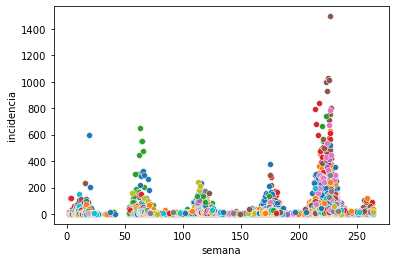

In [19]:
timeSeries = pd.DataFrame()
#listaDistrito = listaDistrito[0:15]
for dis in listaDistrito:
    distrito=df[df['Distrito']==dis]
    distrito.sort_values(['semana'], ascending = True)
    distrito = distrito.reset_index(drop=True)
    distrito = distrito.replace('nan', np.nan).fillna(0.00000000001)
    distrito = distrito.replace([np.inf, -np.inf], np.nan).fillna(0.00000000001)
    timeSeries = timeSeries.append(distrito['incidencia'], ignore_index=True)
    #print(dis)
    ax = sns.scatterplot(y=distrito['incidencia'], x= distrito['semana'])
plt.show()

In [20]:
import tsfresh
from tsfresh import extract_features

#features extraction
extracted_features = extract_features(df1, column_id='ID_distrito', column_sort='semana', column_value='incidencia')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.98it/s]


In [21]:
timeSeries = timeSeries.replace('nan', np.nan).fillna(0.00000000001)
timeSeries = timeSeries.replace([np.inf, -np.inf], np.nan).fillna(0.00000000001)

In [22]:
#from tsfeatures import tsfeatures
df2 = df1[['ID_distrito', 'incidencia', 'semana']]
df2 = df2.reset_index(drop=True)
df2.rename(columns = {'ID_distrito':'unique_id', 'incidencia':'y', 'semana':'ds'}, inplace = True)

In [23]:
y = ts_measures(timeSeries.T, freq=4)
y.insert(0, "Distrito", listaDistrito, allow_duplicates=False)

In [24]:
y = y.fillna(0.0000000001)

In [25]:
features = pd.DataFrame()
Mean=[]
Var=[]
aCF1=[]
Curvature=[]
Peak=[]
Entropy=[]
Fspots=[]
Cpoints_=[]
Semanas_noNull = []
SemanaMax = []

for dis in listaDistrito:
    distrito_1=df['Distrito']==dis
    casos_distrito1=df[distrito_1]
    casos_distrito1 = casos_distrito1.reset_index(drop=True)
    casos_distrito1 = casos_distrito1['incidencia']
    casos_distrito1 = casos_distrito1.replace('nan', np.nan).fillna(0.00000000001)
    casos_distrito1 = casos_distrito1.replace(0, np.nan).fillna(0.00000000001)
    casos_distrito1 = casos_distrito1.replace([np.inf, -np.inf], np.nan).fillna(0.00000000001)
    
    #Features
    mean= tsfresh.feature_extraction.feature_calculators.mean(casos_distrito1)
    var=tsfresh.feature_extraction.feature_calculators.variance(casos_distrito1)
    ACF1=tsfresh.feature_extraction.feature_calculators.autocorrelation(casos_distrito1,1)
    curv = y[y["Distrito"] == dis].curvature
    peak = tsfresh.feature_extraction.feature_calculators.number_peaks(casos_distrito1, int(mean))
    entropy = tsfresh.feature_extraction.feature_calculators.sample_entropy(casos_distrito1)
    fspots = y[y["Distrito"] == dis].fspots
    cpoints_ = y[y["Distrito"] == dis].cpoints
    sn_Null = (casos_distrito1 > 0.00000000001).sum()
    s_max = casos_distrito1.argmax()

    Mean.append(mean)
    Var.append(var)
    aCF1.append(ACF1)
    Curvature.append(curv[0])
    Peak.append(peak)
    Entropy.append(entropy)
    Fspots.append(fspots[0])
    Cpoints_.append(cpoints_)
    Semanas_noNull.append(sn_Null)
    SemanaMax.append(s_max)


C:\Users\gioma\AppData\Roaming\Python\Python38\site-packages\tsfresh\feature_extraction\feature_calculators.py:1734: RuntimeWarning: invalid value encountered in double_scalars
  return -np.log(A / B)
C:\Users\gioma\AppData\Roaming\Python\Python38\site-packages\tsfresh\feature_extraction\feature_calculators.py:1734: RuntimeWarning: divide by zero encountered in log
  return -np.log(A / B)
C:\Users\gioma\AppData\Roaming\Python\Python38\site-packages\tsfresh\feature_extraction\feature_calculators.py:1734: RuntimeWarning: divide by zero encountered in log
  return -np.log(A / B)
C:\Users\gioma\AppData\Roaming\Python\Python38\site-packages\tsfresh\feature_extraction\feature_calculators.py:1734: RuntimeWarning: divide by zero encountered in log
  return -np.log(A / B)
C:\Users\gioma\AppData\Roaming\Python\Python38\site-packages\tsfresh\feature_extraction\feature_calculators.py:1734: RuntimeWarning: invalid value encountered in long_scalars
  return -np.log(A / B)
C:\Users\gioma\AppData\Roam

C:\Users\gioma\AppData\Roaming\Python\Python38\site-packages\tsfresh\feature_extraction\feature_calculators.py:1734: RuntimeWarning: invalid value encountered in double_scalars
  return -np.log(A / B)
C:\Users\gioma\AppData\Roaming\Python\Python38\site-packages\tsfresh\feature_extraction\feature_calculators.py:1734: RuntimeWarning: divide by zero encountered in log
  return -np.log(A / B)
C:\Users\gioma\AppData\Roaming\Python\Python38\site-packages\tsfresh\feature_extraction\feature_calculators.py:1734: RuntimeWarning: invalid value encountered in double_scalars
  return -np.log(A / B)
C:\Users\gioma\AppData\Roaming\Python\Python38\site-packages\tsfresh\feature_extraction\feature_calculators.py:1734: RuntimeWarning: invalid value encountered in double_scalars
  return -np.log(A / B)


In [26]:
data_tuples = list(zip(Mean, Var, aCF1, Curvature, Peak, Entropy, Fspots, Cpoints_, Semanas_noNull, SemanaMax))
features = pd.DataFrame(data_tuples, columns =['Mean', 'Var', 'ACF1', 'Curvature','Peak', 'Entropy','Fspots', 'Cpoints', 'Semanas no Nulas', 'Semana del MAX']) 

# print the data 
features

,Mean,Var,ACF1,Curvature,Peak,Entropy,Fspots,Cpoints,Semanas no Nulas,Semana del MAX
0,6.904494,52.393619,0.813519,-0.863262,1,0.597837,172.0,"0 6.0 Name: cpoints, dtype: float64",29,15
1,44.781615,4841.264885,0.937123,0.391511,0,0.169891,49.0,"0 10.0 Name: cpoints, dtype: float64",173,135
2,44.819130,10423.023812,0.928575,-0.361289,0,0.131780,58.0,"0 2.0 Name: cpoints, dtype: float64",163,42
3,18.306891,827.370071,0.705171,-0.677443,1,0.538157,120.0,"0 3.0 Name: cpoints, dtype: float64",78,57
4,59.676847,11917.269642,0.910305,-0.154082,0,0.152475,84.0,"0 4.0 Name: cpoints, dtype: float64",138,102
...,...,...,...,...,...,...,...,...,...,...
195,33.333333,0.000000,NaN,-0.016121,0,NaN,193.0,"0 0.0 Name: cpoints, dtype: float64",1,0
196,27.129680,0.000000,NaN,-0.016121,0,NaN,193.0,"0 0.0 Name: cpoints, dtype: float64",1,0
197,23.540490,0.000000,NaN,-0.144232,0,inf,191.0,"0 1.0 Name: cpoints, dtype: float64",3,0
198,56.497175,0.000000,NaN,-0.016121,0,NaN,193.0,"0 0.0 Name: cpoints, dtype: float64",1,0


In [27]:
features = features.replace('nan', np.nan).fillna(0.00000001)
features = features.replace(0, np.nan).fillna(0.0000001)
features = features.replace([np.inf, -np.inf], np.nan).fillna(0.00000001)
for col in features.columns:
    features[col] = features[col].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [28]:
features.insert(0, 'Distrito', y.Distrito.values)
features

,Distrito,Mean,Var,ACF1,Curvature,Peak,Entropy,Fspots,Cpoints,Semanas no Nulas,Semana del MAX
0,ASUNCION,6.904494,5.239362e+01,8.135193e-01,-0.863262,1.000000e+00,5.978370e-01,172.0,6.0,29.0,1.500000e+01
1,FERNANDO DE LA MORA,44.781615,4.841265e+03,9.371226e-01,0.391511,1.000000e-07,1.698908e-01,49.0,10.0,173.0,1.350000e+02
2,PEDRO JUAN CABALLERO,44.819130,1.042302e+04,9.285754e-01,-0.361289,1.000000e-07,1.317796e-01,58.0,2.0,163.0,4.200000e+01
3,YBY YAU,18.306891,8.273701e+02,7.051710e-01,-0.677443,1.000000e+00,5.381565e-01,120.0,3.0,78.0,5.700000e+01
4,YPANE,59.676847,1.191727e+04,9.103049e-01,-0.154082,1.000000e-07,1.524750e-01,84.0,4.0,138.0,1.020000e+02
...,...,...,...,...,...,...,...,...,...,...,...
195,ISLA UMBU,33.333333,1.000000e-07,1.000000e-08,-0.016121,1.000000e-07,1.000000e-08,193.0,0.0,1.0,1.000000e-07
196,VILLA OLIVA,27.129680,1.000000e-07,1.000000e-08,-0.016121,1.000000e-07,1.000000e-08,193.0,0.0,1.0,1.000000e-07
197,CARMELO PERALTA,23.540490,1.000000e-07,1.000000e-08,-0.144232,1.000000e-07,1.000000e-08,191.0,1.0,3.0,1.000000e-07
198,DESMOCHADOS,56.497175,1.000000e-07,1.000000e-08,-0.016121,1.000000e-07,1.000000e-08,193.0,0.0,1.0,1.000000e-07


In [29]:
features.to_csv('FBwithNF_2009al2013.csv')

In [30]:
n= timeSeries.shape[0]
n

200

# Funciones de Distancias

In [31]:
import math
from math import sqrt, log, floor
from sklearn.metrics import mean_squared_error
from statistics import mean
from fastdtw import fastdtw
from scipy import stats
from scipy.spatial.distance import pdist

#Euclidean
def euclidean(x, y):
    r=np.linalg.norm(x-y)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Fast Dynamic time warping
def fast_DTW(x, y):
    r, _ = fastdtw(x, y, dist=euclidean)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Spearman
def scorr(x, y):
    r = stats.spearmanr(x, y)[0]
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

#RMSE
def rmse(x, y):
    r=sqrt(mean_squared_error(x,y))
    if math.isnan(r):
        r=1
    #print(r)
    return r

def lcs(a, b):  
    lengths = [[0 for j in range(len(b)+1)] for i in range(len(a)+1)]
    # row 0 and column 0 are initialized to 0 already
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
    x, y = len(a), len(b)
    result = lengths[x][y]
    return result

def discretise(x):
    return int(x * 10)

def multidim_lcs(a, b):
    a = a.applymap(discretise)
    b = b.applymap(discretise)
    rows, dims = a.shape
    lcss = [lcs(a[i+2], b[i+2]) for i in range(dims)]
    return 1 - sum(lcss) / (rows * dims)

#Correlation
def corr(x, y):
    r=np.dot(x-mean(x),y-mean(y))/((np.linalg.norm(x-mean(x)))*(np.linalg.norm(y-mean(y))))
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

In [32]:
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score

DIAMETER_METHODS = ['mean_cluster', 'farthest']
CLUSTER_DISTANCE_METHODS = ['nearest', 'farthest']

def inter_cluster_distances(labels, distances, method='nearest'):
    """Calculates the distances between the two nearest points of each cluster.
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: `nearest` for the distances between the two nearest points in each cluster, or `farthest`
    """
    if method not in CLUSTER_DISTANCE_METHODS:
        raise ValueError(
            'method must be one of {}'.format(CLUSTER_DISTANCE_METHODS))

    if method == 'nearest':
        return __cluster_distances_by_points(labels, distances)
    elif method == 'farthest':
        return __cluster_distances_by_points(labels, distances, farthest=True)


def __cluster_distances_by_points(labels, distances, farthest=False):
    n_unique_labels = len(np.unique(labels))
    cluster_distances = np.full((n_unique_labels, n_unique_labels),
                                float('inf') if not farthest else 0)

    np.fill_diagonal(cluster_distances, 0)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i, len(labels)):
            if labels[i] != labels[ii] and (
                (not farthest and
                 distances[i, ii] < cluster_distances[labels[i], labels[ii]])
                    or
                (farthest and
                 distances[i, ii] > cluster_distances[labels[i], labels[ii]])):
                cluster_distances[labels[i], labels[ii]] = cluster_distances[
                    labels[ii], labels[i]] = distances[i, ii]
    return cluster_distances


def diameter(labels, distances, method='farthest'):
    """Calculates cluster diameters
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: either `mean_cluster` for the mean distance between all elements in each cluster, or `farthest` for the distance between the two points furthest from each other
    """
    if method not in DIAMETER_METHODS:
        raise ValueError('method must be one of {}'.format(DIAMETER_METHODS))

    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    if method == 'mean_cluster':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii]:
                    diameters[labels[i]] += distances[i, ii]

        for i in range(len(diameters)):
            diameters[i] /= sum(labels == i)

    elif method == 'farthest':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii] and distances[i, ii] > diameters[
                        labels[i]]:
                    diameters[labels[i]] = distances[i, ii]
    return diameters

def dunn(labels, distances, diameter_method='farthest',
         cdist_method='nearest'):
    """
    Dunn index for cluster validation (larger is better).
    
    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace
    
    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, and :math:`diam(c_k)` is the diameter of cluster :math:`c_k`.
    Inter-cluster distance can be defined in many ways, such as the distance between cluster centroids or between their closest elements. Cluster diameter can be defined as the mean distance between all elements in the cluster, between all elements to the cluster centroid, or as the distance between the two furthest elements.
    The higher the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart (large :math:`d \\left( c_i,c_j \\right)`).
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param diameter_method: see :py:function:`diameter` `method` parameter
    :param cdist_method: see :py:function:`diameter` `method` parameter
    
    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """

    labels = LabelEncoder().fit(labels).transform(labels)
    
    

    ic_distances = inter_cluster_distances(labels, distances, cdist_method)
    #print("IC",ic_distances)
    if len(ic_distances[ic_distances.nonzero()])==0:
        min_distance = 0
    else:
        min_distance = min(ic_distances[ic_distances.nonzero()])
    max_diameter = max(diameter(labels, distances, diameter_method))
    
    

    return min_distance / max_diameter

In [33]:
features = features.replace('nan', np.nan).fillna(0.00001)

In [34]:
features = features.drop('Distrito', axis=1)

In [35]:
print('Cantidad de nan: ', features.isnull().values.any()) 
#print('Cantidad de inf: ', np.isinf(features).values.sum() ) 

Cantidad de nan:  False


In [36]:
import matplotlib.pyplot as plt
k=5

#Euclidean
f_euclidean_dist = np.zeros((n,n))
for i in range(0,n):
    #print("i",i)
    for j in range(1,n):
         f_euclidean_dist[i,j] = euclidean(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

#Corr
corr_dist = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
            corr_dist[i,j] = corr(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())

#scorr
f_scorr_dist = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        f_scorr_dist[i,j] = scorr(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())
#DTW
f_dtw_dist = np.zeros((n,n))
for i in range(0,n):
    for j in range(0,n):
        f_dtw_dist[i,j] = fast_DTW(features.iloc[i].values.flatten(), features.iloc[j].values.flatten())
    

In [37]:
#Experimentos HAC
HAC_EUCLIDEAN=[]
HAC_CORRELATION=[]
HAC_SPEARMAN=[]
HAC_DTW=[]

HAC_EUCLIDEAN_CHZ=[]
HAC_CORRELATION_CHZ=[]
HAC_SPEARMAN_CHZ=[]
HAC_DTW_CHZ=[]

HAC_EUCLIDEAN_DUNN=[]
HAC_CORRELATION_DUNN=[]
HAC_SPEARMAN_DUNN=[]
HAC_DTW_DUNN=[]

HAC_EUCLIDEAN_DAVID=[]
HAC_CORRELATION_DAVID=[]
HAC_SPEARMAN_DAVID=[]
HAC_DTW_DAVID=[]

HAC_euc = AgglomerativeClustering(n_clusters=k).fit_predict(f_euclidean_dist)
print("HAC + euclidian distance: ")
sil = silhouette_score(f_euclidean_dist, HAC_euc)
print("SC: ", sil)
chz = calinski_harabasz_score(f_euclidean_dist, HAC_euc)
print("CHZ: ", chz)
dunn_= dunn(HAC_euc, f_euclidean_dist, 'farthest', 'farthest')
print("DUNN: ", dunn_)
david_= davies_bouldin_score(f_euclidean_dist, HAC_euc)
print("DAV-BOUD: ", david_)
HAC_EUCLIDEAN.append(sil)
HAC_EUCLIDEAN_CHZ.append(chz)
HAC_EUCLIDEAN_DUNN.append(dunn_)
HAC_EUCLIDEAN_DAVID.append(david_)

HAC_corr = AgglomerativeClustering(n_clusters=k).fit_predict(corr_dist)
print("HAC + corr distance: ")
sil = silhouette_score(corr_dist, HAC_corr)
print("SC: ", sil)
chz = calinski_harabasz_score(corr_dist, HAC_corr)
print("CHZ: ", chz)
dunn_ = dunn(HAC_corr, corr_dist, 'farthest', 'farthest')
print("DUNN: ", dunn_)
david_= davies_bouldin_score(corr_dist, HAC_corr)
print("DAV-BOUD: ", david_)
HAC_CORRELATION.append(sil)
HAC_CORRELATION_CHZ.append(chz)
HAC_CORRELATION_DUNN.append(dunn_)
HAC_CORRELATION_DAVID.append(david_)

HAC_scorr = AgglomerativeClustering(n_clusters=k).fit_predict(f_scorr_dist)
print("HAC + scorr distance: ")
sil = silhouette_score(f_scorr_dist, HAC_scorr)
print("SC: ", sil)
chz = calinski_harabasz_score(f_scorr_dist, HAC_scorr)
print("CHZ: ", chz)
dunn_ = dunn(HAC_scorr, f_scorr_dist, 'farthest', 'farthest')
print("DUNN: ", dunn_)
david_= davies_bouldin_score(f_scorr_dist, HAC_scorr)
print("DAV-BOUD: ", david_)
HAC_SPEARMAN.append(sil)
HAC_SPEARMAN_CHZ.append(chz)
HAC_SPEARMAN_DUNN.append(dunn_)
HAC_SPEARMAN_DAVID.append(david_)

HAC_dtw = AgglomerativeClustering(n_clusters=k).fit_predict(f_dtw_dist)
print("HAC + dtw distance: ")
sil = silhouette_score(f_dtw_dist, HAC_dtw)
print("SC: ", sil)
chz = calinski_harabasz_score(f_dtw_dist, HAC_dtw)
print("CHZ: ", chz)
dunn_ = dunn(HAC_dtw, f_dtw_dist, 'farthest', 'farthest')
print("DUNN: ", dunn_)
david_= davies_bouldin_score(f_dtw_dist, HAC_dtw)
print("DAV-BOUD: ", david_)
HAC_DTW.append(sil)
HAC_DTW_CHZ.append(chz)
HAC_DTW_DUNN.append(dunn_)
HAC_DTW_DAVID.append(david_)
print("-----------------------")

HAC + euclidian distance: 
SC:  0.831697339862108
CHZ:  4839.7086338696745
DUNN:  0.7844943550698807
DAV-BOUD:  0.35797569236092697
HAC + corr distance: 
SC:  0.618686689208228
CHZ:  1643.9816463223478
DUNN:  1.6298280419674132
DAV-BOUD:  0.5272337804558292
HAC + scorr distance: 
SC:  0.3974236732001306
CHZ:  162.37187807357728
DUNN:  0.0
DAV-BOUD:  0.85513062576882
HAC + dtw distance: 
SC:  0.8206508906132721
CHZ:  4670.389800647907
DUNN:  0.8183630739001255
DAV-BOUD:  0.3489375161205392
-----------------------


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [38]:
KM_EUCLIDEAN=[]
KM_CORRELATION=[]
KM_SPEARMAN=[]
KM_DTW=[]

KM_EUCLIDEAN_CHZ=[]
KM_CORRELATION_CHZ=[]
KM_SPEARMAN_CHZ=[]
KM_DTW_CHZ=[]

KM_EUCLIDEAN_DUNN=[]
KM_CORRELATION_DUNN=[]
KM_SPEARMAN_DUNN=[]
KM_DTW_DUNN=[]

KM_EUCLIDEAN_DAVID=[]
KM_CORRELATION_DAVID=[]
KM_SPEARMAN_DAVID=[]
KM_DTW_DAVID=[]
#Experimentos K-Means
km_euc = KMeans(n_clusters=k).fit_predict(f_euclidean_dist)
print("KM + euclidian distance: ")
sil = silhouette_score(f_euclidean_dist, km_euc)
print("SC: ", sil)
chz = calinski_harabasz_score(f_euclidean_dist, km_euc)
print("CHZ: ", chz)
dunn_ = dunn(km_euc, f_euclidean_dist, 'farthest', 'farthest')
print("DUNN: ", dunn_)
david_ = davies_bouldin_score(f_euclidean_dist, km_euc)
print("DAV-BOULD: ", david_)
KM_EUCLIDEAN.append(sil)
KM_EUCLIDEAN_CHZ.append(chz)
KM_EUCLIDEAN_DUNN.append(dunn_)
KM_EUCLIDEAN_DAVID.append(david_)

km_corr = KMeans(n_clusters=k).fit_predict(corr_dist)
print("KM + corr distance: ")
sil = silhouette_score(corr_dist, km_corr)
print("SC: ", sil)
chz = calinski_harabasz_score(corr_dist, km_corr)
print("CHZ: ", chz)
dunn_ = dunn(km_corr, corr_dist, 'farthest', 'farthest') 
print("DUNN: ", dunn_)
david_ = davies_bouldin_score(corr_dist, km_corr)
print("DAV-BOULD: ", david_)
KM_CORRELATION.append(sil)
KM_CORRELATION_CHZ.append(chz)
KM_CORRELATION_DUNN.append(dunn_)
KM_CORRELATION_DAVID.append(david_)

km_scorr = KMeans(n_clusters=k).fit_predict(f_scorr_dist)
print("KM + scorr distance: ")
sil = silhouette_score(f_scorr_dist, km_scorr)
print("SC: ", sil)
chz = calinski_harabasz_score(f_scorr_dist, km_scorr)
print("CHZ: ", chz)
dunn_ = dunn(km_scorr, f_scorr_dist, 'farthest', 'farthest')
print("DUNN: ", dunn_)
david_ = davies_bouldin_score(f_scorr_dist, km_scorr)
print("DAV-BOULD: ", david_)
KM_SPEARMAN.append(sil)
KM_SPEARMAN_CHZ.append(chz)
KM_SPEARMAN_DUNN.append(dunn_)
KM_SPEARMAN_DAVID.append(david_)

km_dtw = KMeans(n_clusters=k).fit_predict(f_dtw_dist)
print("KM + dtw distance: ")
sil = silhouette_score(f_dtw_dist, km_dtw)
print("SC: ", sil)
chz = calinski_harabasz_score(f_dtw_dist, km_dtw)
print("CHZ: ", chz)
dunn_ = dunn(km_dtw, f_dtw_dist, 'farthest', 'farthest')
print("DUNN: ", dunn_)
david_ = davies_bouldin_score(f_dtw_dist, km_dtw)
print("DAV-BOULD: ", david_)
KM_DTW.append(sil)
KM_DTW_CHZ.append(chz)
KM_DTW_DUNN.append(dunn_)
KM_DTW_DAVID.append(david_)
print("-----------------------")

KM + euclidian distance: 
SC:  0.831697339862108
CHZ:  4839.708633869673
DUNN:  0.7844943550698807
DAV-BOULD:  0.35797569236092697
KM + corr distance: 
SC:  0.5854436049237175
CHZ:  1750.7623439967174
DUNN:  1.6298280419674132
DAV-BOULD:  0.5288627193144756
KM + scorr distance: 
SC:  0.40603180834056596
CHZ:  168.85422507650244
DUNN:  0.0
DAV-BOULD:  0.8524598192071207
KM + dtw distance: 
SC:  0.8206508906132721
CHZ:  4670.389800647907
DUNN:  0.8183630739001255
DAV-BOULD:  0.3489375161205392
-----------------------


In [39]:
DBSCAN_EUCLIDEAN=[]
DBSCAN_CORRELATION=[]
DBSCAN_SPEARMAN=[]
DBSCAN_DTW=[]

DBSCAN_EUCLIDEAN_CHZ=[]
DBSCAN_CORRELATION_CHZ=[]
DBSCAN_SPEARMAN_CHZ=[]
DBSCAN_DTW_CHZ=[]

DBSCAN_EUCLIDEAN_DUNN=[]
DBSCAN_CORRELATION_DUNN=[]
DBSCAN_SPEARMAN_DUNN=[]
DBSCAN_DTW_DUNN=[]

DBSCAN_EUCLIDEAN_DAVID=[]
DBSCAN_CORRELATION_DAVID=[]
DBSCAN_SPEARMAN_DAVID=[]
DBSCAN_DTW_DAVID=[]

#CON EUCLIDEAN
DB_euc = DBSCAN(eps=170, min_samples=4).fit_predict(f_euclidean_dist)
print("DBSCAN + euclidian distance: ")
sil =  silhouette_score(f_euclidean_dist, DB_euc)
print("SC: ", sil)
CHZ_ = calinski_harabasz_score(f_euclidean_dist, DB_euc) 
print("CHZ: ", CHZ_)
dunn_ = dunn(DB_euc, f_euclidean_dist, 'farthest', 'farthest')
print("DUNN: ", dunn_)
david_ = davies_bouldin_score(f_euclidean_dist, DB_euc)
print("DAV-BOULD: ", david_)
DBSCAN_EUCLIDEAN.append(sil)
DBSCAN_EUCLIDEAN_CHZ.append(CHZ_)
DBSCAN_EUCLIDEAN_DUNN.append(dunn_)
DBSCAN_EUCLIDEAN_DAVID.append(david_)

#CON CORRELATION
DB_corr = DBSCAN(eps=0.45, min_samples=4).fit_predict(corr_dist)
print("DBSCAN + corr distance: ")
sil = silhouette_score(corr_dist, DB_corr)
print("SC: ", sil)
CHZ_ = calinski_harabasz_score(corr_dist, DB_corr)
print("CHZ: ", CHZ_)
dunn_ = dunn(DB_corr, corr_dist, 'farthest', 'farthest')
print("DUNN: ",)
david_ = davies_bouldin_score(corr_dist, DB_corr)
print("DAV-BOULD: ", david_)
DBSCAN_CORRELATION.append(sil)
DBSCAN_CORRELATION_CHZ.append(CHZ_)
DBSCAN_CORRELATION_DUNN.append(dunn_)
DBSCAN_CORRELATION_DAVID.append(david_)

#CON SPEARMAN
DB_scorr = DBSCAN(eps=0.45, min_samples=4).fit_predict(f_scorr_dist)
print("DBSCAN + scorr distance: ")
sil = silhouette_score(f_scorr_dist, DB_scorr)
print("SC: ", sil)
CHZ_ = calinski_harabasz_score(f_scorr_dist, DB_scorr)
print("CHZ: ", CHZ_)
dunn_ = dunn(DB_scorr, f_scorr_dist, 'farthest', 'farthest')
print("DUNN: ", dunn_)
david_ = davies_bouldin_score(f_scorr_dist, DB_scorr)
print("DAV-BOULD: ", david_)
DBSCAN_SPEARMAN.append(sil)
DBSCAN_SPEARMAN_CHZ.append(CHZ_)
DBSCAN_SPEARMAN_DUNN.append(dunn_)
DBSCAN_SPEARMAN_DAVID.append(david_)

#CON D TIME WARPING
DB_dtw = DBSCAN(eps=170, min_samples=4).fit_predict(f_dtw_dist)
print("DBSCAN + dtw distance: ")
sil = silhouette_score(f_dtw_dist, DB_dtw)
print("SC: ", sil)
CHZ_ = calinski_harabasz_score(f_dtw_dist, DB_dtw)
print("CHZ: ", CHZ_)
dunn_ = dunn(DB_dtw, f_dtw_dist, 'farthest', 'farthest')
print("DUNN: ", dunn_)
david_ = davies_bouldin_score(f_dtw_dist, DB_dtw)
print("DAV-BOULD: ", david_)
DBSCAN_DTW.append(sil)
DBSCAN_DTW_CHZ.append(CHZ_)
DBSCAN_DTW_DUNN.append(dunn_)
DBSCAN_DTW_DAVID.append(david_)

DBSCAN + euclidian distance: 
SC:  0.07858267159643723
CHZ:  7.75808926498362
DUNN:  0.002527827234956609
DAV-BOULD:  1.3826883618286285
DBSCAN + corr distance: 
SC:  0.5224317282345063
CHZ:  514.4011272071014
DUNN: 
DAV-BOULD:  1.1383871422548066
DBSCAN + scorr distance: 
SC:  0.3408413067138128
CHZ:  72.50553755612734
DUNN:  0.0
DAV-BOULD:  0.9296409429376613
DBSCAN + dtw distance: 
SC:  -0.2479760790524292
CHZ:  2.7376489868808234
DUNN:  0.0018489300428421007
DAV-BOULD:  1.4793276000644893


In [40]:
KM1 = KM_EUCLIDEAN + KM_CORRELATION + KM_SPEARMAN + KM_DTW
KM2 = KM_EUCLIDEAN_CHZ + KM_CORRELATION_CHZ + KM_SPEARMAN_CHZ + KM_DTW_CHZ
KM3 = KM_EUCLIDEAN_DUNN + KM_CORRELATION_DUNN + KM_SPEARMAN_DUNN + KM_DTW_DUNN
KM4 = KM_EUCLIDEAN_DAVID + KM_CORRELATION_DAVID + KM_SPEARMAN_DAVID + KM_DTW_DAVID
HAC1 = HAC_EUCLIDEAN + HAC_CORRELATION + HAC_SPEARMAN + HAC_DTW
HAC2 = HAC_EUCLIDEAN_CHZ + HAC_CORRELATION_CHZ + HAC_SPEARMAN_CHZ + HAC_DTW_CHZ
HAC3 = HAC_EUCLIDEAN_DUNN + HAC_CORRELATION_DUNN + HAC_SPEARMAN_DUNN + HAC_DTW_DUNN
HAC4 = HAC_EUCLIDEAN_DAVID + HAC_CORRELATION_DAVID + HAC_SPEARMAN_DAVID + HAC_DTW_DAVID
DBS1 = DBSCAN_EUCLIDEAN + DBSCAN_CORRELATION + DBSCAN_SPEARMAN + DBSCAN_DTW
DBS2 = DBSCAN_EUCLIDEAN_CHZ + DBSCAN_CORRELATION_CHZ + DBSCAN_SPEARMAN_CHZ + DBSCAN_DTW_CHZ
DBS3 = DBSCAN_EUCLIDEAN_DUNN + DBSCAN_CORRELATION_DUNN + DBSCAN_SPEARMAN_DUNN + DBSCAN_DTW_DUNN
DBS4 = DBSCAN_EUCLIDEAN_DAVID + DBSCAN_CORRELATION_DAVID + DBSCAN_SPEARMAN_DAVID + DBSCAN_DTW_DAVID

In [41]:
sil_scores = pd.DataFrame()
sil_scores['METRICA'] = ['Euclidean Distance', 'Pearson Correlation', 'Spearman Correlation', 'Dynamic Time Warping'] 
sil_scores['SIL - HAC'] = np.array(HAC1)
sil_scores['SIL - KM'] = np.array(KM1)
sil_scores['SIL - DB'] = np.array(DBS1)
sil_scores['CHZ - HAC'] = np.array(HAC2)
sil_scores['CHZ - KM'] = np.array(KM2)
sil_scores['CHZ - DB'] = np.array(DBS2)
sil_scores['DUNN - HAC'] = np.array(HAC3)
sil_scores['DUNN - KM'] = np.array(KM3)
sil_scores['DUNN - DB'] = np.array(DBS3)
sil_scores['DAVID - HAC'] = np.array(HAC4)
sil_scores['DAVID - KM'] = np.array(KM4)
sil_scores['DAVID - DB'] = np.array(DBS4)

In [42]:
sil_scores.to_csv('ScoreswithNF_FeatureBased.csv')

In [43]:
aux2 = pd.DataFrame()
aux2['Distrito'] = y.Distrito.values
aux2['Cluster KM'] = km_euc
aux2['Cluster HAC '] = HAC_euc
aux2['Cluster DB SP'] = DB_corr
aux2.to_csv('ClusterFBwithNF_2009al2013.csv')

In [44]:
aux2

,Distrito,Cluster KM,Cluster HAC,Cluster DB SP
0,ASUNCION,0,1,0
1,FERNANDO DE LA MORA,6,4,1
2,PEDRO JUAN CABALLERO,3,0,1
3,YBY YAU,0,1,1
4,YPANE,3,0,1
...,...,...,...,...
195,ISLA UMBU,0,1,0
196,VILLA OLIVA,0,1,0
197,CARMELO PERALTA,0,1,0
198,DESMOCHADOS,0,1,0


In [45]:
np.unique(DB_corr)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [46]:
np.unique(HAC_euc)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [47]:
np.unique(km_euc)

array([0, 1, 2, 3, 4, 5, 6])